<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.


In [3]:
#!pip install yfinance==0.2.38
#!pip install pandas==2.2.2
#!pip install nbformat

In [4]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [5]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [6]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [7]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [8]:
# Create a Ticker object for Tesla (TSLA)
tesla = yf.Ticker("TSLA")

# Extract historical stock data (default: last 5 days)
tesla_history = tesla.history()

# Display the data
print(tesla_history)


                                 Open        High         Low       Close  \
Date                                                                        
2024-09-18 00:00:00-04:00  230.089996  235.679993  226.880005  227.199997   
2024-09-19 00:00:00-04:00  234.000000  244.240005  232.130005  243.919998   
2024-09-20 00:00:00-04:00  241.520004  243.990005  235.919998  238.250000   
2024-09-23 00:00:00-04:00  242.610001  250.000000  241.919998  250.000000   
2024-09-24 00:00:00-04:00  254.080002  257.190002  249.050003  254.270004   
2024-09-25 00:00:00-04:00  252.539993  257.049988  252.279999  257.019989   
2024-09-26 00:00:00-04:00  260.600006  261.750000  251.529999  254.220001   
2024-09-27 00:00:00-04:00  257.380005  260.700012  254.119995  260.459991   
2024-09-30 00:00:00-04:00  259.040009  264.859985  255.770004  261.630005   
2024-10-01 00:00:00-04:00  262.670013  263.980011  248.529999  258.019989   
2024-10-02 00:00:00-04:00  247.550003  251.160004  241.500000  249.020004   

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [9]:
# Create a Ticker object for Tesla (TSLA)
tesla = yf.Ticker("TSLA")

# Extract historical stock data with max period
tesla_data = tesla.history(period="max")

# Display the first few rows of the DataFrame
print(tesla_data.head())

                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [10]:
# Create a Ticker object for Tesla (TSLA)
tesla = yf.Ticker("TSLA")

# Extract historical stock data with max period
tesla_data = tesla.history(period="max")

# Reset the index
tesla_data.reset_index(inplace=True)

# Display the first five rows of the DataFrame
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [11]:
# URL of the webpage with Tesla revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL
response = requests.get(url)

# Save the text of the response as a variable named html_data
html_data = response.text

# Print the first 500 characters of the HTML data as a preview
print(html_data[:500])



<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
	


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`. Make sure to use the `html_data` with the content parameter as follow `html_data.content` .


In [12]:
# URL of the webpage with Tesla revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL
response = requests.get(url)

# Save the text of the response as a variable named html_data
html_data = response.text

# Parse the HTML data using BeautifulSoup with the html.parser
soup = BeautifulSoup(html_data, 'html.parser')

# Print a prettified version of the HTML (first 500 characters)
print(soup.prettify()[:500])

<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
  <title>
   Te


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Find All Tables: Start by searching for all HTML tables on a webpage using `soup.find_all('table')`.
2. Identify the Relevant Table: then loops through each table. If a table contains the text “Tesla Quarterly Revenue,”, select that table.
3. Initialize a DataFrame: Create an empty Pandas DataFrame called `tesla_revenue` with columns “Date” and “Revenue.”
4. Loop Through Rows: For each row in the relevant table, extract the data from the first and second columns (date and revenue).
5. Clean Revenue Data: Remove dollar signs and commas from the revenue value.
6. Add Rows to DataFrame: Create a new row in the DataFrame with the extracted date and cleaned revenue values.
7. Repeat for All Rows: Continue this process for all rows in the table.

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
> Note: Instead of using the deprecated pd.append() method, consider using pd.concat([df, pd.DataFrame], ignore_index=True).
```

</details>


In [13]:
# URL of the webpage with Tesla revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL
response = requests.get(url)

# Save the text of the response as a variable named html_data
html_data = response.text

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Find the table containing Tesla Revenue
table = soup.find('table')

# Prepare a list to hold the revenue data
revenue_data = []

# Loop through each row in the table (skipping the header)
for row in table.find_all("tr")[1:]:  # Skip the header row
    cols = row.find_all("td")
    if len(cols) == 2:  # Ensure there are exactly 2 columns
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()  # Keep revenue as a string for manipulation
        revenue_data.append({"Date": date, "Revenue": revenue})

# Create a DataFrame from the list of revenue data
tesla_revenue = pd.DataFrame(revenue_data)

# Ensure the Revenue column is treated as strings
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(str)

# Remove the dollar sign and commas from the Revenue column using str.replace()
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$', "", regex=True)

# Convert the Revenue column to float
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(float)

# Display the first few rows of the DataFrame
print(tesla_revenue.head())


   Date  Revenue
0  2021  53823.0
1  2020  31536.0
2  2019  24578.0
3  2018  21461.0
4  2017  11759.0


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [14]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)

AttributeError: Can only use .str accessor with string values!

Execute the following lines to remove an null or empty strings in the Revenue column.


In [15]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [16]:
# Display the last 5 rows of the DataFrame
print(tesla_revenue.tail())


    Date  Revenue
8   2013   2013.0
9   2012    413.0
10  2011    204.0
11  2010    117.0
12  2009    112.0


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [24]:
# Create a ticker object for GameStop using its ticker symbol 'GME'
gme_ticker = yf.Ticker('GME')

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [25]:
# Create a ticker object for GameStop using its ticker symbol 'GME'
gme_ticker = yf.Ticker('GME')

# Extract historical stock information and save it in a DataFrame named gme_data
gme_data = gme_ticker.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [26]:
# Create a ticker object for GameStop using its ticker symbol 'GME'
gme_ticker = yf.Ticker('GME')

# Extract historical stock information and save it in a DataFrame named gme_data
gme_data = gme_ticker.history(period="max")

# Reset the index of the DataFrame
gme_data.reset_index(inplace=True)

# Display the first five rows of the gme_data DataFrame
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [28]:
# URL of the webpage to download
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL
response = requests.get(url)

# Save the text of the response as a variable named html_data_2
html_data_2 = response.text

print(html_data_2[:500])  # Print the first 500 characters of the HTML

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface g


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [32]:
# URL of the webpage to download
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL
response = requests.get(url)

# Save the text of the response as a variable named html_data_2
html_data_2 = response.text

# Parse the HTML data using BeautifulSoup with the 'html.parser'
soup = BeautifulSoup(html_data_2, 'html.parser')

print(soup.prettify()[:500])  # Print the first 500 characters to see the structure

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface ge


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [33]:
# URL of the webpage to download
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL
response = requests.get(url)

# Save the text of the response as a variable named html_data_2
html_data_2 = response.text

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data_2, 'html.parser')

# Find the table containing GameStop Revenue
table = soup.find('table')

# Prepare a list to hold the revenue data
revenue_data = []

# Loop through each row in the table (skipping the header)
for row in table.find_all("tr")[1:]:  # Skip the header row
    cols = row.find_all("td")
    if len(cols) == 2:  # Ensure there are exactly 2 columns
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace(',', '').replace('$', '')  # Clean the revenue string
        revenue_data.append({"Date": date, "Revenue": revenue})

# Create a DataFrame from the list of revenue data
gme_revenue = pd.DataFrame(revenue_data)

# Convert the Revenue column to float
gme_revenue["Revenue"] = gme_revenue["Revenue"].astype(float)

# Display the first few rows of the DataFrame to verify
print(gme_revenue.head())


   Date  Revenue
0  2020   6466.0
1  2019   8285.0
2  2018   8547.0
3  2017   7965.0
4  2016   9364.0


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [34]:
print(gme_revenue.tail())

    Date  Revenue
11  2009   8806.0
12  2008   7094.0
13  2007   5319.0
14  2006   3092.0
15  2005   1843.0


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


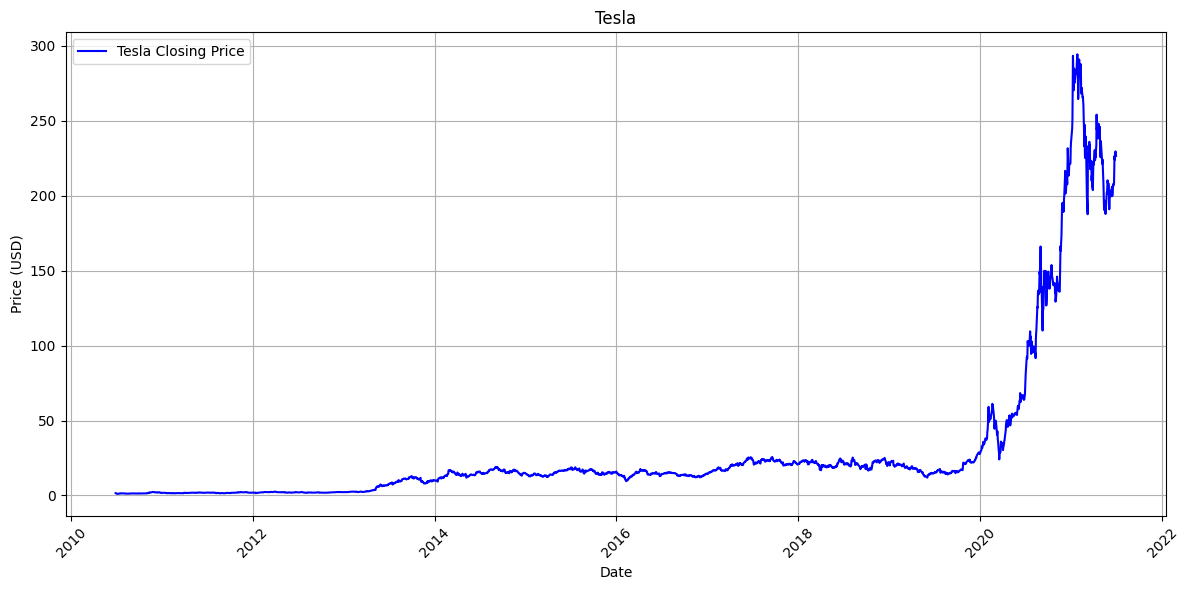

In [37]:
import matplotlib.pyplot as plt  # Make sure to import matplotlib.pyplot

# Create a ticker object for Tesla using its ticker symbol 'TSLA'
tesla_ticker = yf.Ticker('TSLA')

# Extract historical stock information and save it in a DataFrame named tesla_data
tesla_data = tesla_ticker.history(period="max")

# Reset the index of the DataFrame
tesla_data.reset_index(inplace=True)

# Use requests to get Tesla revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data_2 = response.text

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data_2, 'html.parser')

# Find the table containing Tesla Revenue
table = soup.find('table')

# Prepare a list to hold the revenue data
revenue_data = []

# Loop through each row in the table (skipping the header)
for row in table.find_all("tr")[1:]:  # Skip the header row
    cols = row.find_all("td")
    if len(cols) == 2:  # Ensure there are exactly 2 columns
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace(',', '').replace('$', '')  # Clean the revenue string
        revenue_data.append({"Date": date, "Revenue": revenue})

# Create a DataFrame from the list of revenue data
tesla_revenue = pd.DataFrame(revenue_data)

# Convert the Revenue column to float
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(float)

# Function to create a graph of the stock data
def make_graph(stock_data, revenue_data, title):
    # Filter stock data up to June 2021
    filtered_stock_data = stock_data[stock_data['Date'] <= '2021-06-30']
    
    # Plotting the Closing Price
    plt.figure(figsize=(12, 6))
    plt.plot(filtered_stock_data['Date'], filtered_stock_data['Close'], label='Tesla Closing Price', color='blue')
    
    # Adding titles and labels
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    
    # Show the graph
    plt.tight_layout()
    plt.show()

# Call the make_graph function to plot Tesla Stock Data and Revenue
make_graph(tesla_data, tesla_revenue, 'Tesla')

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


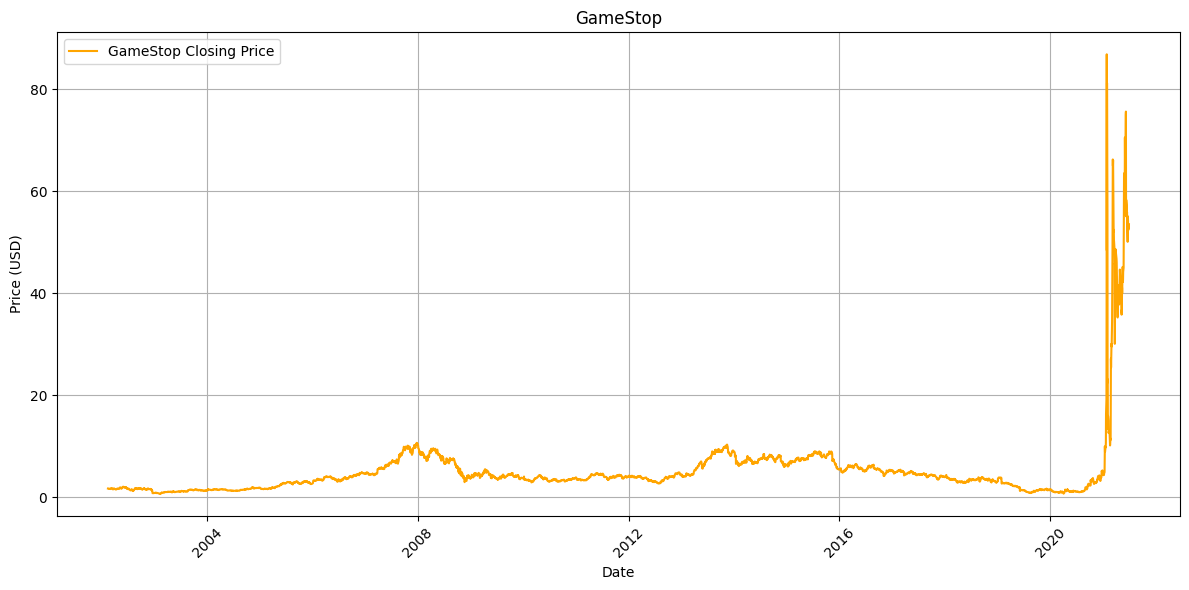

In [38]:
# Create a ticker object for GameStop using its ticker symbol 'GME'
gme_ticker = yf.Ticker('GME')

# Extract historical stock information and save it in a DataFrame named gme_data
gme_data = gme_ticker.history(period="max")

# Reset the index of the DataFrame
gme_data.reset_index(inplace=True)

# Use requests to get GameStop revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data_2 = response.text

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data_2, 'html.parser')

# Find the table containing GameStop Revenue
table = soup.find('table')

# Prepare a list to hold the revenue data
revenue_data = []

# Loop through each row in the table (skipping the header)
for row in table.find_all("tr")[1:]:  # Skip the header row
    cols = row.find_all("td")
    if len(cols) == 2:  # Ensure there are exactly 2 columns
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace(',', '').replace('$', '')  # Clean the revenue string
        revenue_data.append({"Date": date, "Revenue": revenue})

# Create a DataFrame from the list of revenue data
gme_revenue = pd.DataFrame(revenue_data)

# Convert the Revenue column to float
gme_revenue["Revenue"] = gme_revenue["Revenue"].astype(float)

# Function to create a graph of the stock data
def make_graph(stock_data, revenue_data, title):
    # Filter stock data up to June 2021
    filtered_stock_data = stock_data[stock_data['Date'] <= '2021-06-30']
    
    # Plotting the Closing Price
    plt.figure(figsize=(12, 6))
    plt.plot(filtered_stock_data['Date'], filtered_stock_data['Close'], label='GameStop Closing Price', color='orange')
    
    # Adding titles and labels
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    
    # Show the graph
    plt.tight_layout()
    plt.show()

# Call the make_graph function to plot GameStop Stock Data and Revenue
make_graph(gme_data, gme_revenue, 'GameStop')


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

```toggle ## Change Log
```
```toggle | Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
```
```toggle | ----------------- | ------- | ------------- | ------------------------- |
```
```toggle | 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
```
```toggle | 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
```
```toggle | 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |
```
